In [3]:
import numpy as np
from math import *
from pylab import *

def read_file ( filename ):
    """
    Lit le fichier contenant les données du geyser Old Faithful
    """
    # lecture de l'en-téte
    infile = open ( filename, "r" )
    for ligne in infile:
        if ligne.find ( "eruptions waiting" ) != -1:
            break
            # ici, on a la liste des temps d'éruption et des délais d'irruptions
    data = []
    for ligne in infile:
        nb_ligne, eruption, waiting = [ float (x) for x in ligne.split () ]
        data.append ( eruption )
        data.append ( waiting )
    infile.close ()
    # transformation de la liste en tableau 2D
    data = np.asarray ( data )
    data.shape = ( int ( data.size / 2 ), 2 )
    return data

data = read_file ( "2015_tme4_faithful.txt" )

In [19]:
def normale_bidim( x, z, params ):
    mu_x, mu_z, sigma_x, sigma_z, rho = params
    p1 = 1 / ( 2 * np.pi * sigma_x * sigma_z * np.sqrt( 1 - np.power( rho, 2 ) ) )
    p2 = 1 / ( 2 * ( 1 - np.power( rho, 2) ) )
    p3 = np.power( (x - mu_x) / sigma_x, 2 )
    p4 = 2 * rho * ( ( ( x - mu_x ) * ( z - mu_z ) ) / ( sigma_x * sigma_z ) ) 
    p5 = np.power( (z - mu_z) / sigma_z, 2 )
    return p1 * np.exp( - p2 * ( p3 - p4 + p5 ) )

In [20]:
normale_bidim ( 1, 2, (1.0,2.0,3.0,4.0,0) )

0.013262911924324612

In [21]:
normale_bidim ( 1, 0, (1.0,2.0,1.0,2.0,0.7) )

0.0418047994276145

In [7]:
import matplotlib.pyplot as plt
def dessine_1_normale ( params ):
    
    # récupération des paramétres
    mu_x, mu_z, sigma_x, sigma_z, rho = params
    
    # on détermine les coordonnées des coins de la figure
    x_min = mu_x - 2 * sigma_x
    x_max = mu_x + 2 * sigma_x
    z_min = mu_z - 2 * sigma_z
    z_max = mu_z + 2 * sigma_z
    
    # création de la grille
    x = np.linspace ( x_min, x_max, 100 )
    z = np.linspace ( z_min, z_max, 100 )
    X, Z = np.meshgrid(x, z)
    
    # calcul des normales
    norm = X.copy ()
    for i in range ( x.shape[0] ):
        for j in range ( z.shape[0] ):
            norm[i,j] = normale_bidim ( x[i], z[j], params )
            
    # affichage
    fig = plt.figure ()
    plt.contour ( X, Z, norm, cmap=cm.autumn )
    plt.show ()

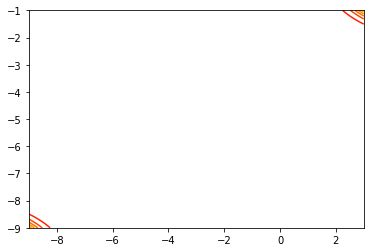

In [8]:
dessine_1_normale ( (-3.0,-5.0,3.0,2.0,0.7) )

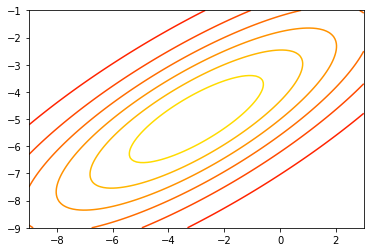

In [9]:
dessine_1_normale ( (-3.0,-5.0,3.0,2.0,0.2) )

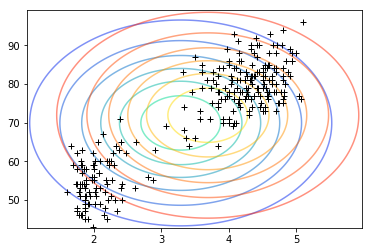

[[ 3.28778309 69.89705882  1.13927121 13.56996002  0.        ]
 [ 3.68778309 71.89705882  1.13927121 13.56996002  0.        ]]
d :  [0.4 0.6]


In [54]:
def dessine_normales ( data, params, weights, bounds, ax ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # on détermine les coordonnées des coins de la figure
    x_min = bounds[0]
    x_max = bounds[1]
    z_min = bounds[2]
    z_max = bounds[3]

    # création de la grille
    nb_x = nb_z = 100
    x = np.linspace ( x_min, x_max, nb_x )
    z = np.linspace ( z_min, z_max, nb_z )
    X, Z = np.meshgrid(x, z)

    # calcul des normales
    norm0 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
            norm0[j,i] = normale_bidim ( x[i], z[j], params[0] )# * weights[0]
    norm1 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
             norm1[j,i] = normale_bidim ( x[i], z[j], params[1] )# * weights[1]

    # affichages des normales et des points du dataset
    ax.contour ( X, Z, norm0, cmap=cm.winter, alpha = 0.5 )
    ax.contour ( X, Z, norm1, cmap=cm.autumn, alpha = 0.5 )
    for point in data:
        ax.plot ( point[0], point[1], 'k+' )


def find_bounds ( data, params ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # calcul des coins
    x_min = min ( mu_x0 - 2 * sigma_x0, mu_x1 - 2 * sigma_x1, data[:,0].min() )
    x_max = max ( mu_x0 + 2 * sigma_x0, mu_x1 + 2 * sigma_x1, data[:,0].max() )
    z_min = min ( mu_z0 - 2 * sigma_z0, mu_z1 - 2 * sigma_z1, data[:,1].min() )
    z_max = max ( mu_z0 + 2 * sigma_z0, mu_z1 + 2 * sigma_z1, data[:,1].max() )

    return ( x_min, x_max, z_min, z_max )


# affichage des données : calcul des moyennes et variances des 2 colonnes
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1  = data[:,0].std ()
std2  = data[:,1].std ()

# les paramètres des 2 normales sont autour de ces moyennes
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
                     (mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [0.4, 0.6] )
bounds = find_bounds ( data, params )

# affichage de la figure
fig = plt.figure ()
ax = fig.add_subplot(111)
dessine_normales ( data, params, weights, bounds, ax )
plt.show ()

print(params)
print("d : ",weights)

In [22]:
def Q_i ( data, params, weights ):
    Q = np.zeros( data.shape )
    Q[:,0] = weights[0] * normale_bidim( data[:,0], data[:,1], params[0] )
    Q[:,1] = weights[1] * normale_bidim( data[:,0], data[:,1], params[1] )
    S = Q[:,0] + Q[:,1]
    Q[:,0] /= S
    Q[:,1] /= S
    return Q

In [23]:
#current_params = np.array ( [(mu_x, mu_z, sigma_x, sigma_z, rho),   # params 1ère loi normale
#                             (mu_x, mu_z, sigma_x, sigma_z, rho)] ) # params 2ème loi normale
current_params = np.array([[ 3.28778309, 69.89705882, 1.13927121, 13.56996002, 0. ],
                           [ 3.68778309, 71.89705882, 1.13927121, 13.56996002, 0. ]])

# current_weights = np.array ( [ pi_0, pi_1 ] )
current_weights = np.array ( [ 0.5, 0.5 ] )

T = Q_i ( data, current_params, current_weights )
print(T)

[[0.46939088 0.53060912]
 [0.66899936 0.33100064]
 [0.50349992 0.49650008]
 [0.61489199 0.38510801]
 [0.38336517 0.61663483]
 [0.58880846 0.41119154]
 [0.36370054 0.63629946]
 [0.45319835 0.54680165]
 [0.66597113 0.33402887]
 [0.39678193 0.60321807]
 [0.66674347 0.33325653]
 [0.43178097 0.56821903]
 [0.42637974 0.57362026]
 [0.68892521 0.31107479]
 [0.37635861 0.62364139]
 [0.6484613  0.3515387 ]
 [0.65298434 0.34701566]
 [0.36662753 0.63337247]
 [0.68719135 0.31280865]
 [0.41996736 0.58003264]
 [0.67617442 0.32382558]
 [0.68892521 0.31107479]
 [0.48363046 0.51636954]
 [0.53749981 0.46250019]
 [0.41197248 0.58802752]
 [0.45858658 0.54141342]
 [0.65505529 0.34494471]
 [0.44056782 0.55943218]
 [0.45294617 0.54705383]
 [0.40629466 0.59370534]
 [0.43213395 0.56786605]
 [0.40900976 0.59099024]
 [0.52258721 0.47741279]
 [0.43366997 0.56633003]
 [0.46503453 0.53496547]
 [0.65892553 0.34107447]
 [0.67878225 0.32121775]
 [0.37438794 0.62561206]
 [0.65456976 0.34543024]
 [0.35282612 0.64717388]


In [24]:
current_params = np.array([[ 3.2194684, 67.83748075, 1.16527301, 13.9245876,  0.9070348 ],
                           [ 3.75499261, 73.9440348, 1.04650191, 12.48307362, 0.88083712]])
current_weights = np.array ( [ 0.49896815, 0.50103185] )
T2 = Q_i ( data, current_params, current_weights )
T2

array([[0.44352868, 0.55647132],
       [0.70465534, 0.29534466],
       [0.47692866, 0.52307134],
       [0.61531052, 0.38468948],
       [0.38502072, 0.61497928],
       [0.58493721, 0.41506279],
       [0.37621272, 0.62378728],
       [0.42185109, 0.57814891],
       [0.70665534, 0.29334466],
       [0.39346396, 0.60653604],
       [0.70167538, 0.29832462],
       [0.41383928, 0.58616072],
       [0.40975898, 0.59024102],
       [0.74656919, 0.25343081],
       [0.37669861, 0.62330139],
       [0.67922662, 0.32077338],
       [0.65636463, 0.34363537],
       [0.37135623, 0.62864377],
       [0.73399065, 0.26600935],
       [0.40550488, 0.59449512],
       [0.7213767 , 0.2786233 ],
       [0.74656919, 0.25343081],
       [0.45501587, 0.54498413],
       [0.51582119, 0.48417881],
       [0.38523308, 0.61476692],
       [0.42949663, 0.57050337],
       [0.6836669 , 0.3163331 ],
       [0.42010952, 0.57989048],
       [0.43210955, 0.56789045],
       [0.39352601, 0.60647399],
       [0.

In [29]:
def M_step ( data, Q, params, weights ):
    xi = data[:,0]
    zi = data[:,1]
    Q_0 = np.sum(Q[:,0])
    Q_1 = np.sum(Q[:,1])
    
    # MAJ des pi
    pi_0 = Q_0 / ( Q_0 + Q_1 )
    pi_1 = Q_1 / ( Q_0 + Q_1 )
    
    # MAJ des mu
    mu_x0 = np.sum( Q[:,0] * xi ) / Q_0
    mu_x1 = np.sum( Q[:,1] * xi ) / Q_1
    mu_z0 = np.sum( Q[:,0] * zi ) / Q_0
    mu_z1 = np.sum( Q[:,1] * zi ) / Q_1
    
    # MAJ des sigma
    sigma_x0 = np.sqrt( np.sum( Q[:,0] * np.power( ( xi - mu_x0 ), 2 ) ) / Q_0 )
    sigma_x1 = np.sqrt( np.sum( Q[:,1] * np.power( ( xi - mu_x1 ), 2 ) ) / Q_1 )
    sigma_z0 = np.sqrt( np.sum( Q[:,0] * np.power( ( zi - mu_z0 ), 2 ) ) / Q_0 )
    sigma_z1 = np.sqrt( np.sum( Q[:,1] * np.power( ( zi - mu_z1 ), 2 ) ) / Q_1 )
    
    # MAJ des rho
    rho_1 = np.sum( Q[:,0] * ( ( xi - mu_x0 ) * ( zi - mu_z0 ) ) / ( sigma_x0 * sigma_z0 ) ) / Q_0
    rho_2 = np.sum( Q[:,1] * ( ( xi - mu_x1 ) * ( zi - mu_z1 ) ) / ( sigma_x1 * sigma_z1 ) ) / Q_1
    
    return np.array([[mu_x0, mu_z0, sigma_x0, sigma_z0, rho_1], [mu_x1, mu_z1, sigma_x1, sigma_z1, rho_2]]), np.array([pi_0, pi_1])


In [30]:
current_params = array([(2.51460515, 60.12832316, 0.90428702, 11.66108819, 0.86533355),
                        (4.2893485,  79.76680985, 0.52047055,  7.04450242, 0.58358284)])
current_weights = array([ 0.45165145,  0.54834855])
Q = Q_i ( data, current_params, current_weights )
M_step ( data, Q, current_params, current_weights )

(array([[ 2.33418412, 58.06784269,  0.74224878, 10.17591317,  0.82161824],
        [ 4.33880698, 80.36132657,  0.37819574,  5.71033527,  0.3008745 ]]),
 array([0.42453067, 0.57546933]))

In [41]:
def EM (data, params, weights, nbIt ):
    
    res_EM = []
    
    for i in range(nbIt):
    
        E = Q_i ( data, params, weights )
        new_params, new_weights = M_step ( data, E, params, weights )
        
        res_EM.append((new_params, new_weights))
        
        params = new_params
        weights = new_weights
        
    return res_EM
    

In [59]:
# affichage des données : calcul des moyennes et variances des 2 colonnes
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1  = data[:,0].std ()
std2  = data[:,1].std ()

# les paramètres des 2 normales sont autour de ces moyennes
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
                     (mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [0.4, 0.6] )

res_EM = EM( data, params, weights, 15)

step animate = 0


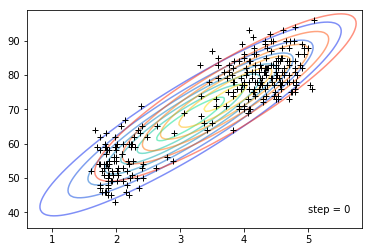

step animate = 0
step animate = 0
step animate = 1
step animate = 2
step animate = 3
step animate = 4
step animate = 5
step animate = 6
step animate = 7
step animate = 8
step animate = 9
step animate = 10
step animate = 11
step animate = 12
step animate = 13
step animate = 14


In [60]:
# calcul des bornes pour contenir toutes les lois normales calculées
def find_video_bounds ( data, res_EM ):
    bounds = np.asarray ( find_bounds ( data, res_EM[0][0] ) )
    for param in res_EM:
        new_bound = find_bounds ( data, param[0] )
        for i in [0,2]:
            bounds[i] = min ( bounds[i], new_bound[i] )
        for i in [1,3]:
            bounds[i] = max ( bounds[i], new_bound[i] )
    return bounds

bounds = find_video_bounds ( data, res_EM )


import matplotlib.animation as animation

# création de l'animation : tout d'abord on crée la figure qui sera animée
fig = plt.figure ()
ax = fig.gca (xlim=(bounds[0], bounds[1]), ylim=(bounds[2], bounds[3]))

# la fonction appelée à chaque pas de temps pour créer l'animation
def animate ( i ):
    ax.cla ()
    dessine_normales (data, res_EM[i][0], res_EM[i][1], bounds, ax)
    ax.text(5, 40, 'step = ' + str ( i ))
    print ("step animate = %d" % ( i ))

# exécution de l'animation
anim = animation.FuncAnimation(fig, animate,
                               frames = len ( res_EM ), interval=500 )
plt.show ()

# éventuellement, sauver l'animation dans une vidéo
anim.save('old_faithful.avi', bitrate=4000)